In [77]:
import pandas as pd
import matplotlib

In [78]:
df = pd.read_csv('ViewingActivity_project.csv')

In [79]:
df.shape

(137, 10)

In [80]:
df.head(3)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country;
0,Khanyi M,2020-05-17 12:49:32,00:29:02,NaN,Into the Night: Season 1: Rik (Episode 5),NaN,Chrome PC (Cadmium),00:34:46,00:34:46,ZA (South Africa);
1,Khanyi M,2020-05-16 20:05:50,00:00:35,NaN,Into the Night: Season 1: Rik (Episode 5),NaN,Android DefaultWidevineL3Phone Android Phone,00:07:24,Not latest view,ZA (South Africa);
2,Khanyi M,2020-05-16 16:29:29,00:08:57,NaN,Into the Night: Season 1: Rik (Episode 5),NaN,Android DefaultWidevineL3Phone Android Phone,00:08:24,Not latest view,ZA (South Africa);


In [81]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country;'], axis=1)

In [82]:
df.head(3)

,Start Time,Duration,Title
0,2020-05-17 12:49:32,00:29:02,Into the Night: Season 1: Rik (Episode 5)
1,2020-05-16 20:05:50,00:00:35,Into the Night: Season 1: Rik (Episode 5)
2,2020-05-16 16:29:29,00:08:57,Into the Night: Season 1: Rik (Episode 5)


In [83]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [84]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [93]:
df = df.set_index('Start Time')

df.index = df.index.tz_convert('Africa/Johannesburg')

df = df.reset_index()

df.head(3)

,Start Time,Duration,Title
0,2020-05-17 14:49:32+02:00,0 days 00:29:02,Into the Night: Season 1: Rik (Episode 5)
1,2020-05-16 22:05:50+02:00,0 days 00:00:35,Into the Night: Season 1: Rik (Episode 5)
2,2020-05-16 18:29:29+02:00,0 days 00:08:57,Into the Night: Season 1: Rik (Episode 5)


In [86]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, Africa/Johannesburg]
Duration                          timedelta64[ns]
Title                                      object
dtype: object

In [87]:
show = df[df['Title'].str.contains('Dynasty', regex=False)]

In [88]:
show.shape

(101, 3)

In [89]:
show = show[(show['Duration'] > '0 days 00:01:00')]
show.shape

(93, 3)

In [90]:
show['Duration'].sum()

Timedelta('1 days 01:41:02')

In [91]:
show['weekday'] =show['Start Time'].dt.weekday
show['hour'] = show['Start Time'].dt.hour

<AxesSubplot:title={'center':'Dynasty Episodes Watched by Hour'}>

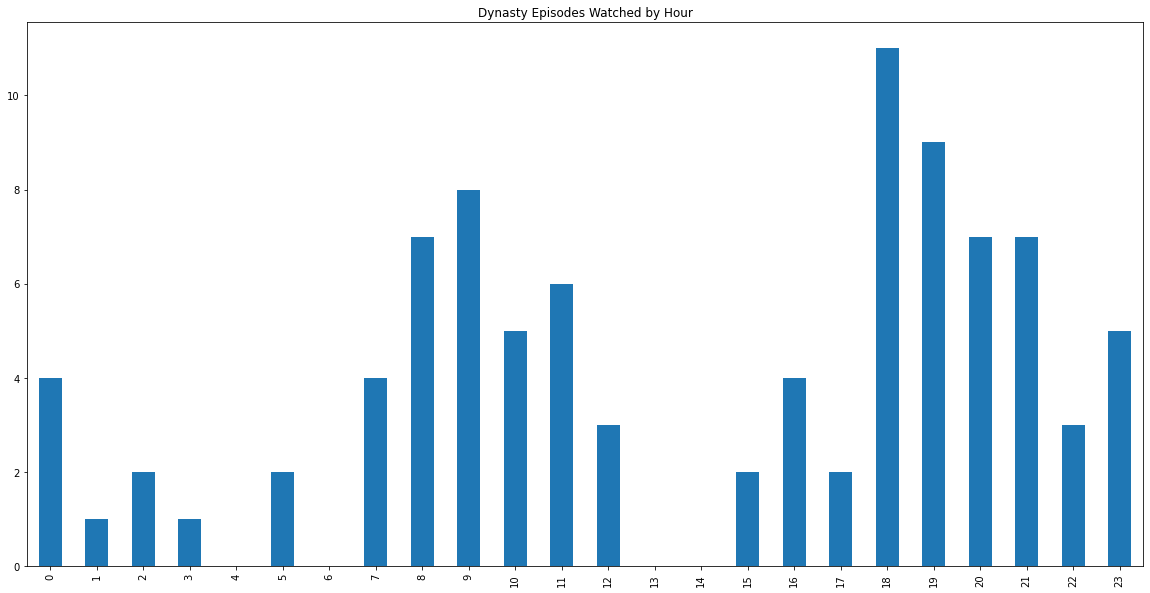

In [92]:
show['hour'] = pd.Categorical(show['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

show_by_hour = show['hour'].value_counts()

show_by_hour = show_by_hour.sort_index()

show_by_hour.plot(kind='bar', figsize=(20,10), title='Dynasty Episodes Watched by Hour')